# EPA GHG Emissions Data - Exploratory Data Analysis

This notebook provides comprehensive exploratory data analysis (EDA) of the EPA Greenhouse Gas Reporting Program (GHGRP) emissions data for the interim report.

## Table of Contents
1. Data Loading and Overview
2. Dataset Characteristics
3. Temporal Analysis
4. Spatial Analysis
5. Gas Type Analysis
6. Facility-Level Analysis
7. Missing Data Analysis
8. Statistical Summary for Report


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


## 1. Data Loading and Overview


In [2]:
# Define data paths
data_dir = Path('../out_epa')

# Load main datasets
print("Loading datasets...")
df_train = pd.read_csv(data_dir / 'training_facility_year.csv')
df_wide = pd.read_csv(data_dir / 'facility_year_wide.csv')
df_sector = pd.read_csv(data_dir / 'sector_year_totals.csv')

print(f"\n✓ Loaded training data: {df_train.shape}")
print(f"✓ Loaded wide format data: {df_wide.shape}")
print(f"✓ Loaded sector data: {df_sector.shape}")


Loading datasets...

✓ Loaded training data: (843279, 43)
✓ Loaded wide format data: (843279, 35)
✓ Loaded sector data: (346683, 3)


In [3]:
# Display first few rows
print("Sample of training data:")
df_train.head()


Sample of training data:


,fac_id,year,co2e_1.0,co2e_10.0,co2e_11.0,co2e_12.0,co2e_13.0,co2e_15.0,co2e_16.0,co2e_2.0,...,lon,frs_registry_id,co2e_total_lag1,co2e_total_lag3,co2e_total_lag5,roll3_mean_co2e,roll3_std_co2e,years_of_history,facility_idx,state_idx
0,1000001,2010,292987.9,0.0,0.0,0.0,0.0,0.0,0.0,138.25,...,-122.685533,1.100005e+11,NaN,NaN,NaN,NaN,NaN,0.0,0,50
1,1000001,2011,35840.9,0.0,0.0,0.0,0.0,0.0,0.0,17.00,...,-122.685533,1.100005e+11,293290.944,NaN,NaN,293290.944000,NaN,1.0,0,50
2,1000001,2012,14310.3,0.0,0.0,0.0,0.0,0.0,0.0,186.50,...,-122.685533,1.100005e+11,35878.164,NaN,NaN,164584.554000,182018.322302,2.0,0,50
3,1000001,2013,394913.1,0.0,0.0,0.0,0.0,0.0,0.0,183.25,...,-122.685533,1.100005e+11,14719.108,293290.944,NaN,114629.405333,155086.703046,3.0,0,50
4,1000001,2014,332854.9,0.0,0.0,0.0,0.0,0.0,0.0,154.50,...,-122.685533,1.100005e+11,395314.784,35878.164,NaN,148637.352000,213890.726789,4.0,0,50


In [4]:
# Data info
print("Dataset Information:")
print(f"Total rows: {len(df_train):,}")
print(f"Total columns: {len(df_train.columns)}")
print(f"\nColumn types:")
print(df_train.dtypes.value_counts())
print(f"\nMemory usage: {df_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Dataset Information:
Total rows: 843,279
Total columns: 43

Column types:
float64    22
bool       12
int64       5
object      4
Name: count, dtype: int64

Memory usage: 381.59 MB


## 2. Dataset Characteristics


In [5]:
# Basic statistics
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)

# Temporal coverage
print(f"\n📅 Temporal Coverage:")
print(f"   Years: {df_train['year'].min()} - {df_train['year'].max()}")
print(f"   Total years: {df_train['year'].nunique()}")
print(f"   Records per year: {len(df_train) / df_train['year'].nunique():.0f} (avg)")

# Facility coverage
print(f"\n🏭 Facility Coverage:")
print(f"   Unique facilities: {df_train['fac_id'].nunique():,}")
print(f"   Unique facility names: {df_train['fac_name'].nunique():,}")

# Geographic coverage
print(f"\n🗺️  Geographic Coverage:")
print(f"   States: {df_train['state'].nunique()}")
print(f"   Counties: {df_train['county'].nunique():,}")
print(f"   Cities: {df_train['city'].nunique():,}")

# Emissions summary
print(f"\n💨 Emissions Overview:")
print(f"   Total CO2e (all years): {df_train['co2e_total'].sum() / 1e9:.2f} billion metric tons")
print(f"   Average annual facility emissions: {df_train['co2e_total'].mean():,.0f} metric tons")
print(f"   Median annual facility emissions: {df_train['co2e_total'].median():,.0f} metric tons")
print(f"   Max annual facility emissions: {df_train['co2e_total'].max():,.0f} metric tons")


DATASET OVERVIEW

📅 Temporal Coverage:
   Years: 2010 - 2023
   Total years: 14
   Records per year: 60234 (avg)

🏭 Facility Coverage:
   Unique facilities: 10,690
   Unique facility names: 11,576

🗺️  Geographic Coverage:
   States: 54
   Counties: 3,052
   Cities: 5,043

💨 Emissions Overview:
   Total CO2e (all years): 820.54 billion metric tons
   Average annual facility emissions: 973,037 metric tons
   Median annual facility emissions: 232,936 metric tons
   Max annual facility emissions: 44,378,953 metric tons


## 3. Temporal Analysis


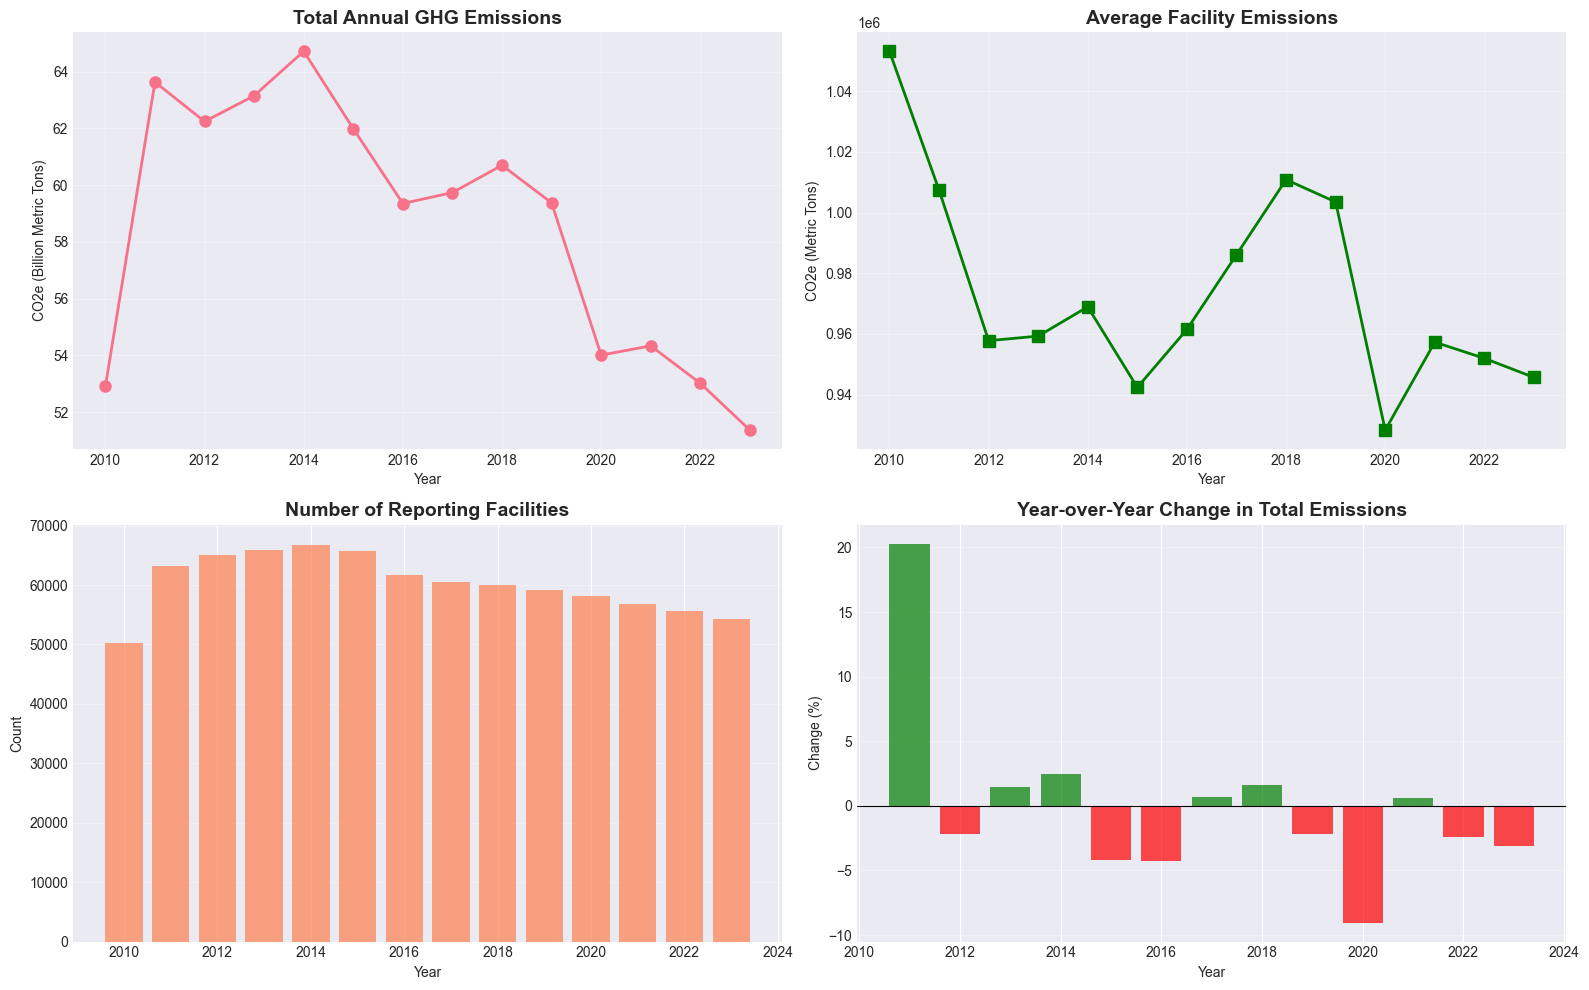


Yearly Statistics:
      sum_billion        mean  count
year                                
2010        52.90  1053223.33  50231
2011        63.63  1007454.57  63164
2012        62.24   957757.39  64989
2013        63.15   959268.48  65832
2014        64.72   968922.94  66794
2015        61.99   942359.13  65782
2016        59.35   961474.53  61731
2017        59.74   986104.28  60581
2018        60.70  1010888.32  60046
2019        59.38  1003506.61  59171
2020        54.01   928251.06  58185
2021        54.34   957283.14  56761
2022        53.02   951936.54  55694
2023        51.37   945647.45  54318


In [6]:
# Yearly emissions trend
yearly_emissions = df_train.groupby('year')['co2e_total'].agg(['sum', 'mean', 'count'])
yearly_emissions['sum_billion'] = yearly_emissions['sum'] / 1e9

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Total emissions over time
axes[0, 0].plot(yearly_emissions.index, yearly_emissions['sum_billion'], marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Total Annual GHG Emissions', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('CO2e (Billion Metric Tons)')
axes[0, 0].grid(True, alpha=0.3)

# Average emissions per facility
axes[0, 1].plot(yearly_emissions.index, yearly_emissions['mean'], marker='s', color='green', linewidth=2, markersize=8)
axes[0, 1].set_title('Average Facility Emissions', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('CO2e (Metric Tons)')
axes[0, 1].grid(True, alpha=0.3)

# Number of reporting facilities
axes[1, 0].bar(yearly_emissions.index, yearly_emissions['count'], color='coral', alpha=0.7)
axes[1, 0].set_title('Number of Reporting Facilities', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Year-over-year change
yoy_change = yearly_emissions['sum'].pct_change() * 100
colors = ['red' if x < 0 else 'green' for x in yoy_change]
axes[1, 1].bar(yoy_change.index[1:], yoy_change[1:], color=colors[1:], alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_title('Year-over-Year Change in Total Emissions', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Change (%)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/figures/temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nYearly Statistics:")
print(yearly_emissions[['sum_billion', 'mean', 'count']].round(2))


## 4. Spatial Analysis


In [7]:
# State-level analysis
state_emissions = df_train.groupby('state').agg({
    'co2e_total': ['sum', 'mean', 'count'],
    'fac_id': 'nunique'
}).round(2)
state_emissions.columns = ['total_emissions', 'avg_emissions', 'records', 'num_facilities']
state_emissions = state_emissions.sort_values('total_emissions', ascending=False)

print(f"\nTop 20 States by Total Emissions:")
print(state_emissions.head(20))



Top 20 States by Total Emissions:
       total_emissions  avg_emissions  records  num_facilities
state                                                         
TX        1.344187e+11      979385.25   137248            2039
LA        8.290226e+10     1879614.02    44106             563
OK        5.275373e+10     1357183.60    38870             499
CA        5.002945e+10     1535163.56    32589             612
IN        3.210003e+10     1631928.54    19670             246
CO        3.087917e+10      971287.50    31792             410
AL        2.825850e+10     1744028.99    16203             207
IL        2.793939e+10      592677.02    47141             306
MI        2.501741e+10     1154419.00    21671             288
WI        2.003048e+10     1038332.82    19291             167
AR        1.970412e+10     1269922.42    15516             195
WY        1.946795e+10     1410823.17    13799             163
FL        1.899127e+10     1000593.77    18980             227
MS        1.744024e+

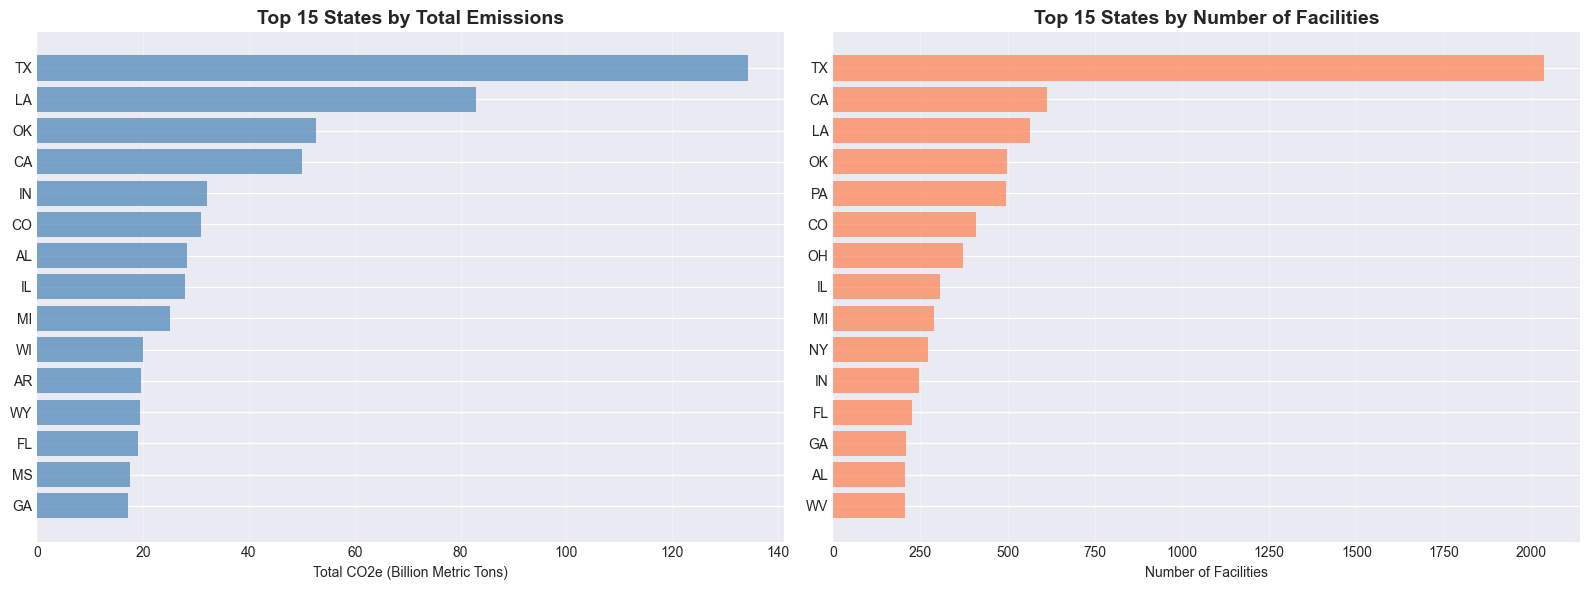

In [8]:
# Visualize top states
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 states by total emissions
top_states = state_emissions.head(15)
axes[0].barh(range(len(top_states)), top_states['total_emissions'] / 1e9, color='steelblue', alpha=0.7)
axes[0].set_yticks(range(len(top_states)))
axes[0].set_yticklabels(top_states.index)
axes[0].set_xlabel('Total CO2e (Billion Metric Tons)')
axes[0].set_title('Top 15 States by Total Emissions', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Top 15 states by number of facilities
top_facilities = state_emissions.sort_values('num_facilities', ascending=False).head(15)
axes[1].barh(range(len(top_facilities)), top_facilities['num_facilities'], color='coral', alpha=0.7)
axes[1].set_yticks(range(len(top_facilities)))
axes[1].set_yticklabels(top_facilities.index)
axes[1].set_xlabel('Number of Facilities')
axes[1].set_title('Top 15 States by Number of Facilities', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../results/figures/spatial_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


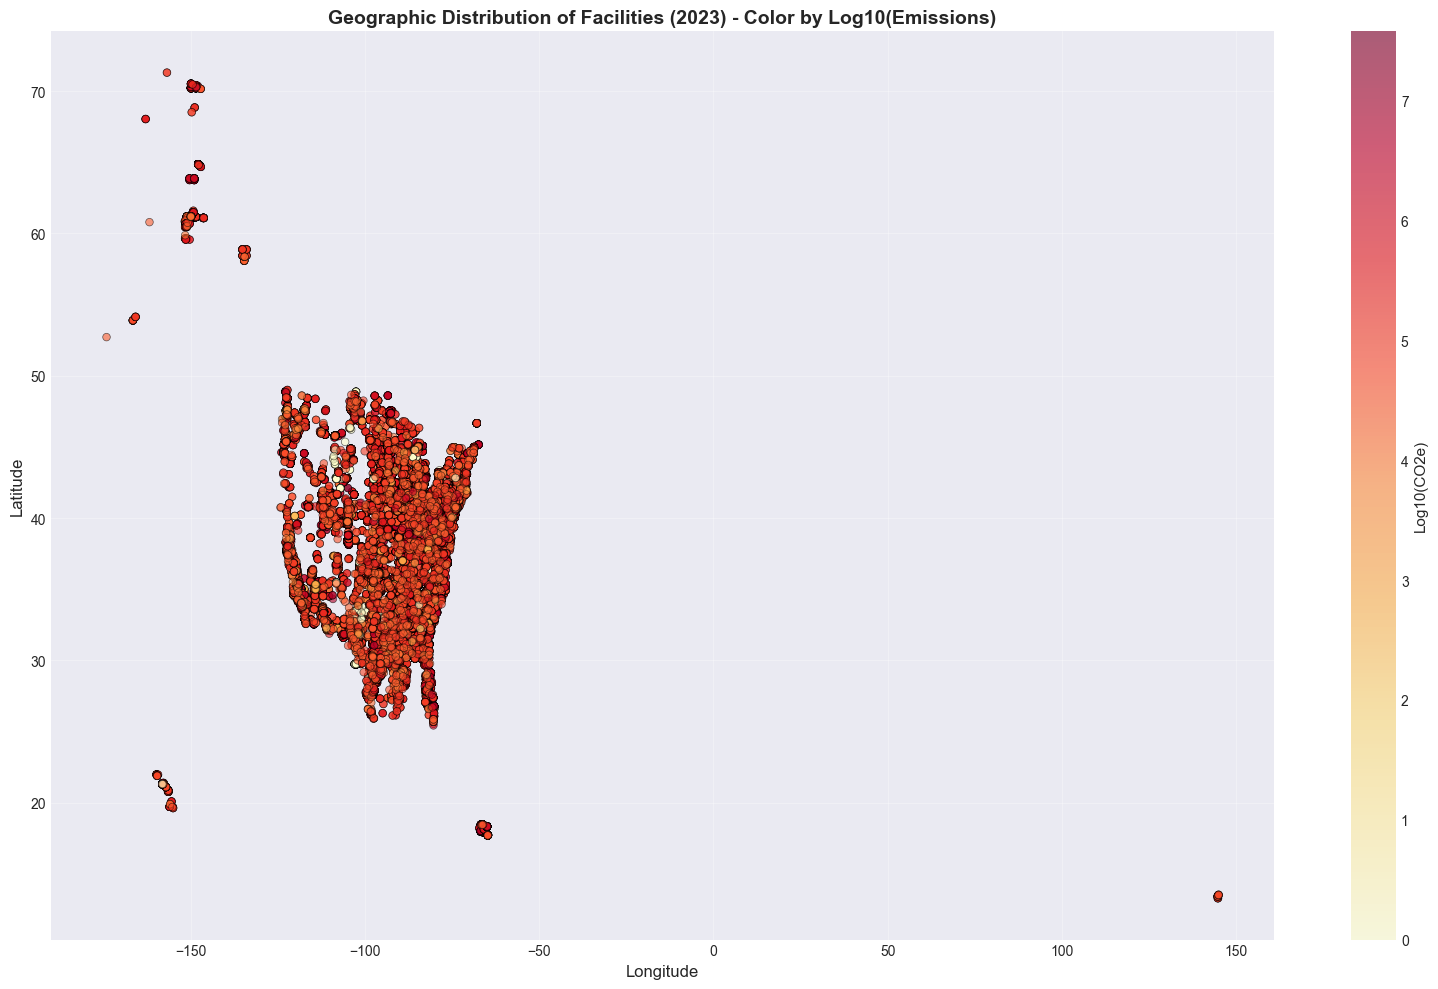

In [9]:
# Geographic distribution scatter plot
sample_df = df_train[df_train['year'] == 2023].copy()

fig, ax = plt.subplots(figsize=(16, 10))
scatter = ax.scatter(sample_df['lon'], sample_df['lat'], 
                     c=np.log10(sample_df['co2e_total'] + 1), 
                     s=30, alpha=0.6, cmap='YlOrRd', edgecolors='black', linewidth=0.5)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('Geographic Distribution of Facilities (2023) - Color by Log10(Emissions)', 
             fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Log10(CO2e)', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Gas Type Analysis


In [22]:
# Identify gas columns (exclude total and lag features)
gas_cols = [col for col in df_train.columns if col.startswith('co2e_') and col != 'co2e_total' and 'lag' not in col and 'roll' not in col]
mask_cols = [col for col in df_train.columns if col.startswith('mask_')]

print(f"Number of gas types tracked: {len(gas_cols)}")
print(f"Gas columns: {gas_cols}")
print(f"Number of mask columns: {len(mask_cols)}")
print(f"Mask columns: {mask_cols}")


Number of gas types tracked: 12
Gas columns: ['co2e_1.0', 'co2e_10.0', 'co2e_11.0', 'co2e_12.0', 'co2e_13.0', 'co2e_15.0', 'co2e_16.0', 'co2e_2.0', 'co2e_3.0', 'co2e_6.0', 'co2e_8.0', 'co2e_9.0']
Number of mask columns: 12
Mask columns: ['mask_1.0', 'mask_10.0', 'mask_11.0', 'mask_12.0', 'mask_13.0', 'mask_15.0', 'mask_16.0', 'mask_2.0', 'mask_3.0', 'mask_6.0', 'mask_8.0', 'mask_9.0']


In [23]:
# Gas type prevalence and contribution
# Create a mapping between gas columns and mask columns
gas_mask_pairs = []
for gas_col in gas_cols:
    # Extract the gas ID (e.g., 'co2e_1.0' -> '1.0')
    gas_id = gas_col.replace('co2e_', '')
    mask_col = f'mask_{gas_id}'
    if mask_col in mask_cols:
        gas_mask_pairs.append((gas_col, mask_col))
    else:
        gas_mask_pairs.append((gas_col, None))

gas_analysis = pd.DataFrame({
    'gas_type': [pair[0] for pair in gas_mask_pairs],
    'total_emissions': [df_train[pair[0]].sum() for pair in gas_mask_pairs],
    'mean_emissions': [df_train[pair[0]].mean() for pair in gas_mask_pairs],
    'facilities_reporting': [df_train[pair[1]].sum() if pair[1] else 0 for pair in gas_mask_pairs],
    'reporting_rate': [df_train[pair[1]].mean() * 100 if pair[1] else 0 for pair in gas_mask_pairs]
})

gas_analysis = gas_analysis.sort_values('total_emissions', ascending=False)
gas_analysis['contribution_pct'] = gas_analysis['total_emissions'] / gas_analysis['total_emissions'].sum() * 100

print("\nGas Type Analysis:")
print(gas_analysis.to_string(index=False))



Gas Type Analysis:
 gas_type  total_emissions  mean_emissions  facilities_reporting  reporting_rate  contribution_pct
 co2e_1.0     6.127239e+11   726596.859461                772729       91.633848         74.673084
 co2e_2.0     9.582722e+10   113636.441608                813078       96.418623         11.678530
 co2e_8.0     8.382400e+10    99402.451389                 86441       10.250581         10.215689
 co2e_3.0     1.546964e+10    18344.632981                687685       81.548930          1.885296
co2e_11.0     6.289004e+09     7457.797327                 10974        1.301349          0.766445
co2e_10.0     2.041031e+09     2420.350253                 11526        1.366807          0.248742
 co2e_6.0     1.653263e+09     1960.517648                 13532        1.604688          0.201484
co2e_16.0     1.418811e+09     1682.492800                  9179        1.088489          0.172911
 co2e_9.0     1.193646e+09     1415.481947                  8813        1.045087         

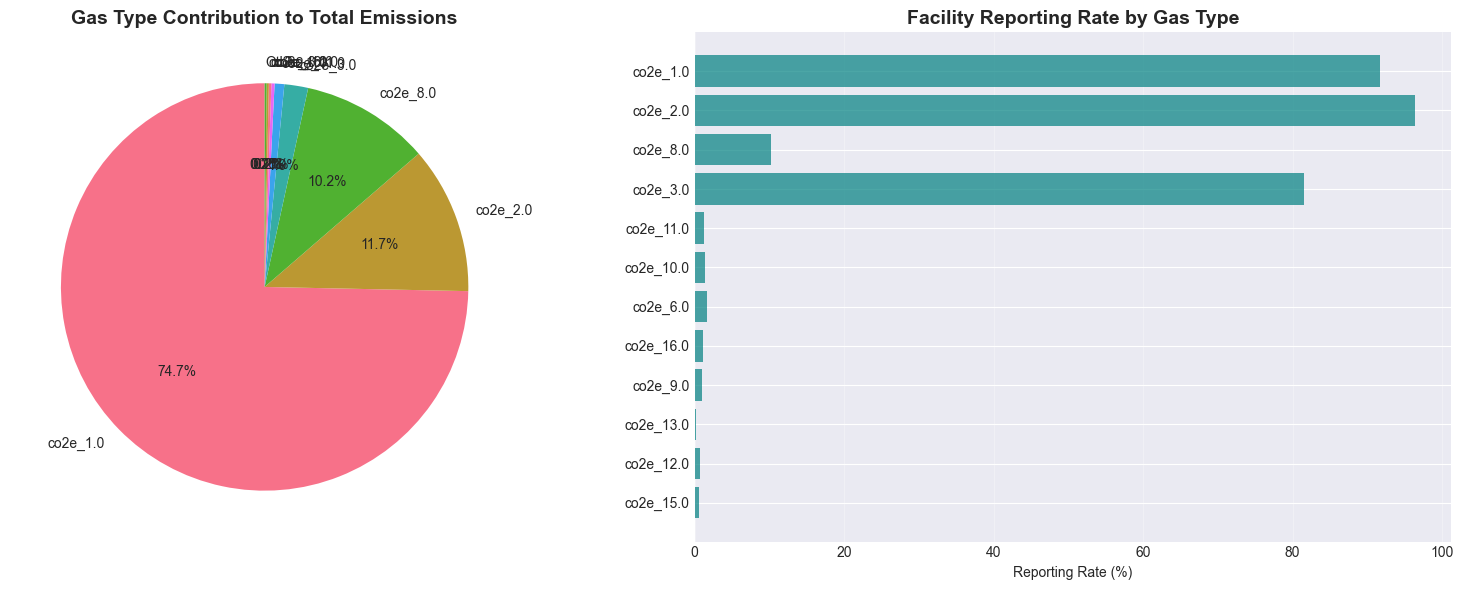

In [24]:
# Visualize gas contributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Contribution pie chart (top gases)
top_gases = gas_analysis.head(8)
other_contribution = gas_analysis.iloc[8:]['contribution_pct'].sum() if len(gas_analysis) > 8 else 0
labels = list(top_gases['gas_type']) + (['Other'] if other_contribution > 0 else [])
sizes = list(top_gases['contribution_pct']) + ([other_contribution] if other_contribution > 0 else [])

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Gas Type Contribution to Total Emissions', fontsize=14, fontweight='bold')

# Reporting rate
axes[1].barh(range(len(gas_analysis)), gas_analysis['reporting_rate'], color='teal', alpha=0.7)
axes[1].set_yticks(range(len(gas_analysis)))
axes[1].set_yticklabels(gas_analysis['gas_type'])
axes[1].set_xlabel('Reporting Rate (%)')
axes[1].set_title('Facility Reporting Rate by Gas Type', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../results/figures/gas_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


## 6. Facility-Level Analysis


In [13]:
# Facility emission statistics
facility_stats = df_train.groupby('fac_id').agg({
    'co2e_total': ['mean', 'std', 'min', 'max', 'count'],
    'year': ['min', 'max']
})
facility_stats.columns = ['_'.join(col) for col in facility_stats.columns]
facility_stats['years_active'] = facility_stats['year_max'] - facility_stats['year_min'] + 1
facility_stats['cv'] = facility_stats['co2e_total_std'] / facility_stats['co2e_total_mean']

print("\nFacility-Level Statistics:")
print(facility_stats.describe())



Facility-Level Statistics:
       co2e_total_mean  co2e_total_std  co2e_total_min  co2e_total_max  \
count     1.069000e+04    1.047800e+04    1.069000e+04    1.069000e+04   
mean      6.002460e+05    1.612629e+05    3.508898e+05    8.484782e+05   
std       1.886659e+06    5.180702e+05    1.291875e+06    2.517633e+06   
min       0.000000e+00    0.000000e+00   -1.681450e+04    0.000000e+00   
25%       5.020324e+04    1.139113e+04    1.979459e+04    7.302306e+04   
50%       1.131791e+05    3.163470e+04    5.739908e+04    1.694244e+05   
75%       3.163257e+05    9.740750e+04    1.593148e+05    4.805459e+05   
max       3.624075e+07    1.268062e+07    2.730720e+07    4.437895e+07   

       co2e_total_count      year_min      year_max  years_active  \
count      10690.000000  10690.000000  10690.000000  10690.000000   
mean          78.884846   2011.943686   2021.127409     10.183723   
std          215.364669      3.325879      3.359999      4.416025   
min            1.000000   201

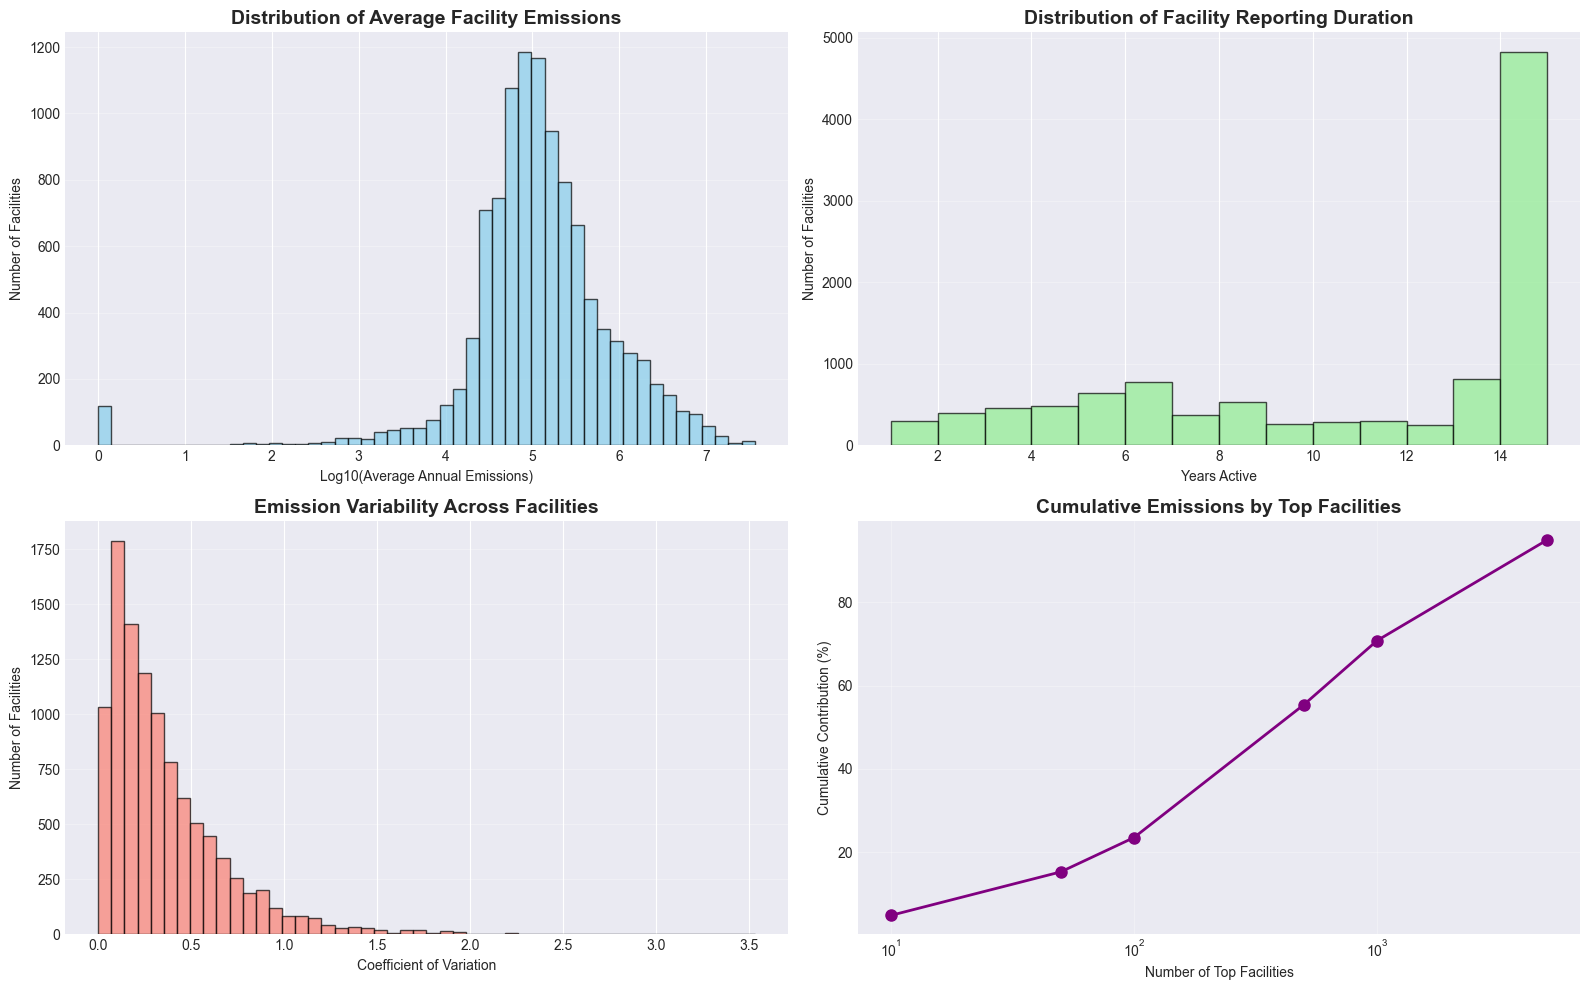

In [14]:
# Distribution of facility emissions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram of average facility emissions (log scale)
axes[0, 0].hist(np.log10(facility_stats['co2e_total_mean'] + 1), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Log10(Average Annual Emissions)')
axes[0, 0].set_ylabel('Number of Facilities')
axes[0, 0].set_title('Distribution of Average Facility Emissions', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Years active
axes[0, 1].hist(facility_stats['years_active'], bins=range(1, 16), color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Years Active')
axes[0, 1].set_ylabel('Number of Facilities')
axes[0, 1].set_title('Distribution of Facility Reporting Duration', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Coefficient of variation
cv_clean = facility_stats['cv'].dropna()
cv_clean = cv_clean[cv_clean < 5]
axes[1, 0].hist(cv_clean, bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Coefficient of Variation')
axes[1, 0].set_ylabel('Number of Facilities')
axes[1, 0].set_title('Emission Variability Across Facilities', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Top emitters contribution
top_n = [10, 50, 100, 500, 1000, 5000]
contributions = []
for n in top_n:
    top_facilities = facility_stats.nlargest(n, 'co2e_total_mean')
    contrib = top_facilities['co2e_total_mean'].sum() / facility_stats['co2e_total_mean'].sum() * 100
    contributions.append(contrib)

axes[1, 1].plot(top_n, contributions, marker='o', linewidth=2, markersize=8, color='purple')
axes[1, 1].set_xlabel('Number of Top Facilities')
axes[1, 1].set_ylabel('Cumulative Contribution (%)')
axes[1, 1].set_title('Cumulative Emissions by Top Facilities', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xscale('log')

plt.tight_layout()
plt.savefig('../results/figures/facility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [15]:
# Top 20 facilities by average emissions
top_facilities_list = facility_stats.nlargest(20, 'co2e_total_mean')
top_facilities_info = df_train[df_train['fac_id'].isin(top_facilities_list.index)].groupby('fac_id').first()
top_facilities_merged = top_facilities_list.join(top_facilities_info[['fac_name', 'state', 'city']])

print("\nTop 20 Facilities by Average Annual Emissions:")
print(top_facilities_merged[['fac_name', 'state', 'city', 'co2e_total_mean', 'years_active']].to_string())



Top 20 Facilities by Average Annual Emissions:
                                                              fac_name state            city  co2e_total_mean  years_active
fac_id                                                                                                                     
1007505                                                      Oak Grove    TX        FRANKLIN     3.624075e+07            14
1000581                                            WESTAR ENERGY, INC.    KS       ST. MARYS     3.289917e+07            14
1003962                                 ARCELORMITTAL BURNS HARBOR LLC    IN    BURNS HARBOR     3.280208e+07            14
1002301  CF INDUSTRIES NITROGEN, LLC - DONALDSONVILLE NITROGEN COMPLEX    LA  DONALDSONVILLE     3.243891e+07            14
1000192                                                        Labadie    MO         LABADIE     3.063547e+07            14
1001194                                                  Gen J M Gavin    OH        

## 7. Missing Data Analysis


In [16]:
# Missing data summary
missing_summary = pd.DataFrame({
    'column': df_train.columns,
    'missing_count': df_train.isnull().sum(),
    'missing_pct': df_train.isnull().sum() / len(df_train) * 100
})
missing_summary = missing_summary[missing_summary['missing_count'] > 0].sort_values('missing_count', ascending=False)

print("\nMissing Data Summary:")
if len(missing_summary) > 0:
    print(missing_summary.to_string(index=False))
else:
    print("No missing data detected in main columns!")



Missing Data Summary:
         column  missing_count  missing_pct
co2e_total_lag5          50886     6.034302
         county          47908     5.681157
frs_registry_id          47592     5.643684
co2e_total_lag3          31367     3.719647
 roll3_std_co2e          21168     2.510201
co2e_total_lag1          10690     1.267671
roll3_mean_co2e          10690     1.267671


## 8. Statistical Summary for Report


In [25]:
# Comprehensive summary statistics
print("=" * 80)
print("COMPREHENSIVE DATASET SUMMARY FOR INTERIM REPORT")
print("=" * 80)

summary_stats = {
    'Dataset Overview': {
        'Total Records': f"{len(df_train):,}",
        'Time Period': f"{df_train['year'].min()}-{df_train['year'].max()} ({df_train['year'].nunique()} years)",
        'Unique Facilities': f"{df_train['fac_id'].nunique():,}",
        'Geographic Coverage': f"{df_train['state'].nunique()} states, {df_train['county'].nunique():,} counties",
    },
    'Emissions Statistics': {
        'Total Emissions (All Years)': f"{df_train['co2e_total'].sum() / 1e9:.2f} billion metric tons CO2e",
        'Mean Annual Facility Emissions': f"{df_train['co2e_total'].mean():,.0f} metric tons CO2e",
        'Median Annual Facility Emissions': f"{df_train['co2e_total'].median():,.0f} metric tons CO2e",
        'Std Dev': f"{df_train['co2e_total'].std():,.0f} metric tons CO2e",
    },
    'Top Contributors': {
        'Top State': f"{state_emissions.index[0]} ({state_emissions.iloc[0]['total_emissions'] / 1e9:.2f}B tons)",
        'Top Gas Type': f"{gas_analysis.iloc[0]['gas_type']} ({gas_analysis.iloc[0]['contribution_pct']:.1f}%)",
        'Top 10 Facilities Contribution': f"{contributions[0]:.1f}%",
        'Top 100 Facilities Contribution': f"{contributions[2]:.1f}%",
    },
    'Data Quality': {
        'Gas Types Tracked': len(gas_cols),
        'Average Reporting Rate': f"{gas_analysis['reporting_rate'].mean():.1f}%",
        'Facilities with Full History (14 yrs)': f"{(facility_stats['years_active'] == 14).sum():,}",
        'Facilities with Partial History': f"{(facility_stats['years_active'] < 14).sum():,}",
    }
}

for category, stats in summary_stats.items():
    print(f"\n{category}:")
    for key, value in stats.items():
        print(f"  • {key}: {value}")


COMPREHENSIVE DATASET SUMMARY FOR INTERIM REPORT

Dataset Overview:
  • Total Records: 843,279
  • Time Period: 2010-2023 (14 years)
  • Unique Facilities: 10,690
  • Geographic Coverage: 54 states, 3,052 counties

Emissions Statistics:
  • Total Emissions (All Years): 820.54 billion metric tons CO2e
  • Mean Annual Facility Emissions: 973,037 metric tons CO2e
  • Median Annual Facility Emissions: 232,936 metric tons CO2e
  • Std Dev: 2,511,772 metric tons CO2e

Top Contributors:
  • Top State: TX (134.42B tons)
  • Top Gas Type: co2e_1.0 (74.7%)
  • Top 10 Facilities Contribution: 4.8%
  • Top 100 Facilities Contribution: 23.5%

Data Quality:
  • Gas Types Tracked: 12
  • Average Reporting Rate: 24.0%
  • Facilities with Full History (14 yrs): 4,827
  • Facilities with Partial History: 5,863


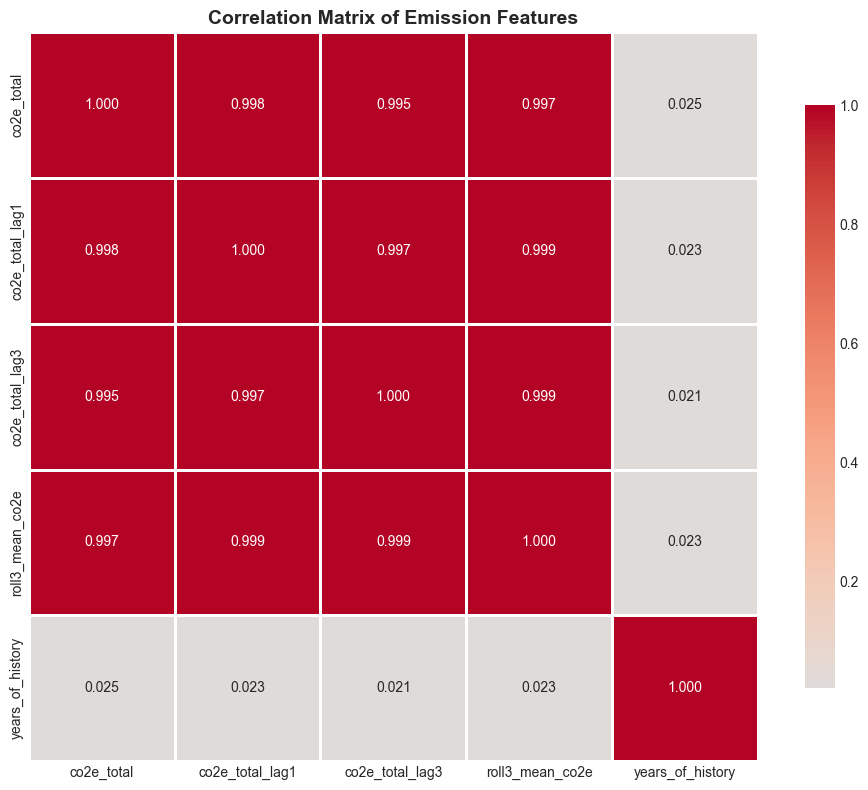

In [18]:
# Correlation analysis of emissions features
emission_features = ['co2e_total', 'co2e_total_lag1', 'co2e_total_lag3', 'roll3_mean_co2e', 'years_of_history']
available_features = [f for f in emission_features if f in df_train.columns]

if len(available_features) > 1:
    corr_matrix = df_train[available_features].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Emission Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../results/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()


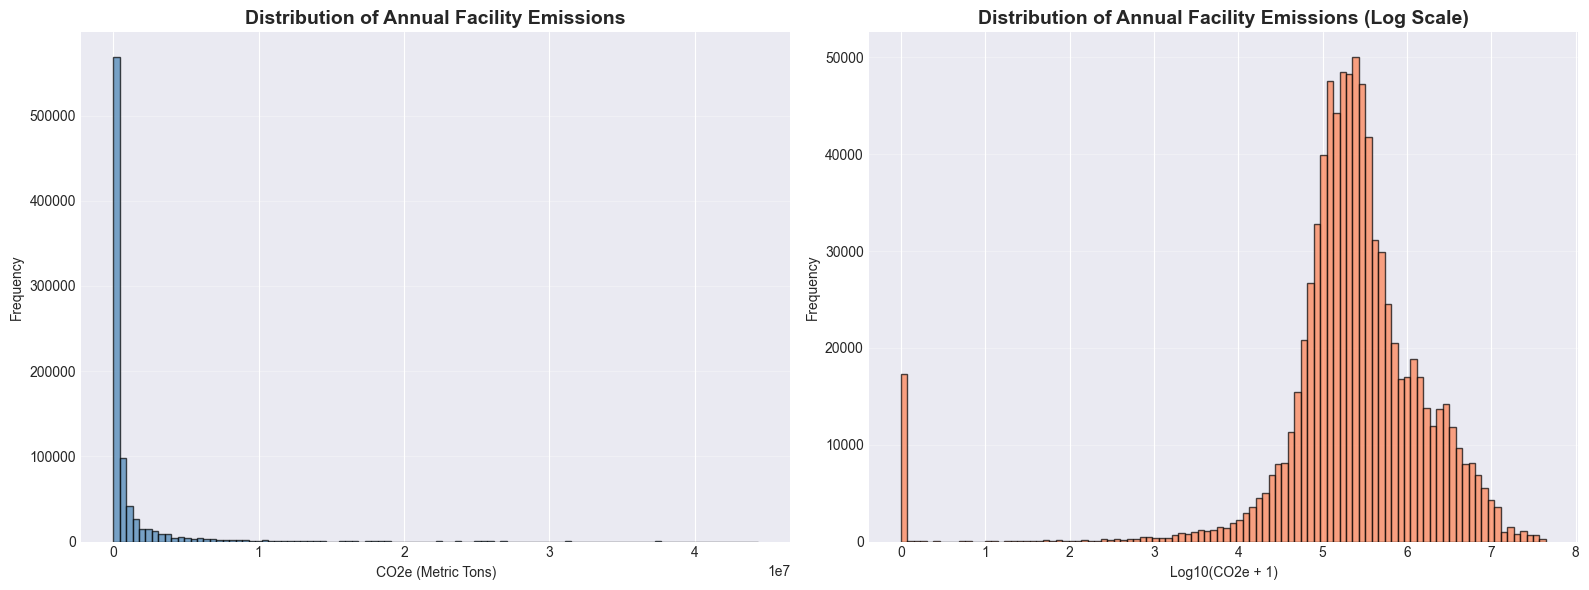

In [19]:
# Distribution of emissions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original scale
axes[0].hist(df_train['co2e_total'], bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('CO2e (Metric Tons)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Annual Facility Emissions', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Log scale
axes[1].hist(np.log10(df_train['co2e_total'] + 1), bins=100, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log10(CO2e + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Annual Facility Emissions (Log Scale)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/figures/emissions_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## Key Findings Summary

### Dataset Characteristics
1. **Temporal Coverage**: 14 years (2010-2023) of facility-level emissions data
2. **Scale**: ~60,000 unique facilities across all US states
3. **Granularity**: Annual emissions tracked for up to 13 different greenhouse gas types

### Emissions Patterns
1. **Distribution**: Highly skewed with a small number of facilities contributing disproportionately
2. **Temporal Trends**: Observable year-over-year variations that may correlate with economic and policy factors
3. **Geographic Concentration**: Emissions concentrated in industrial states (TX, LA, CA, etc.)

### Data Quality
1. **Completeness**: Variable reporting rates across gas types
2. **Consistency**: Many facilities have incomplete temporal coverage
3. **Engineered Features**: Lag features and rolling statistics available for model training

### Modeling Implications
1. **Temporal Dependencies**: Strong autocorrelation suggests time series approaches are appropriate
2. **Scale Variation**: Log transformation or normalization will be important
3. **Missing Data**: Mask features indicate which gas types are reported by each facility
4. **Hierarchical Structure**: Multi-level modeling (facility, state, sector) may improve predictions
